In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import scipy.stats as st

In [3]:
n=100
x=np.random.rand(n)
y= 3+7*x + np.random.rand(n)

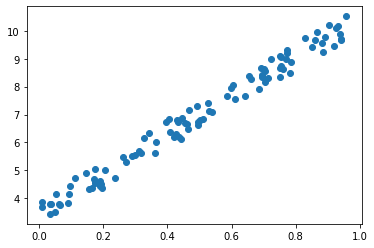

In [4]:
plt.scatter(x,y)

In [5]:
slope, intercept, CC, PV, STD = st.linregress(x,y)
print(slope,intercept)

7.046575164207693 3.4709510321489203


In [6]:
def yFunc(x):
    y = slope*x + intercept
    return y

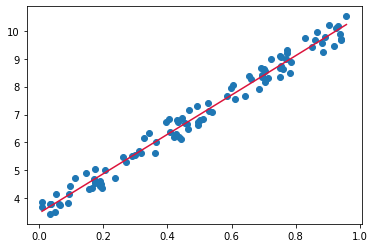

In [7]:
plt.scatter(x,y)
plt.plot([x.min(),x.max()],[yFunc(x.min()),yFunc(x.max())], c='crimson')

In [8]:
eps = y - intercept - slope*x
eps[:5]

array([-0.43000651,  0.13756094,  0.4550409 , -0.18911539, -0.13092932])

In [9]:
xl = np.linspace(0,1)

In [10]:
e_pi = np.var(eps)*(1+1.0/n+(xl-x.mean())**2/np.sum((x-x.mean())**2))

In [11]:
zl = st.t.ppf(0.01, n-1)
zu = st.t.ppf(0.9,n-1)
ll = yFunc(xl) + np.sqrt(e_pi)*zl
ul = yFunc(xl) + np.sqrt(e_pi)*zu

In [12]:
yFunc(xl)

array([ 3.47095103,  3.61475869,  3.75856634,  3.902374  ,  4.04618166,
        4.18998931,  4.33379697,  4.47760463,  4.62141228,  4.76521994,
        4.9090276 ,  5.05283525,  5.19664291,  5.34045057,  5.48425822,
        5.62806588,  5.77187353,  5.91568119,  6.05948885,  6.2032965 ,
        6.34710416,  6.49091182,  6.63471947,  6.77852713,  6.92233479,
        7.06614244,  7.2099501 ,  7.35375776,  7.49756541,  7.64137307,
        7.78518072,  7.92898838,  8.07279604,  8.21660369,  8.36041135,
        8.50421901,  8.64802666,  8.79183432,  8.93564198,  9.07944963,
        9.22325729,  9.36706495,  9.5108726 ,  9.65468026,  9.79848791,
        9.94229557, 10.08610323, 10.22991088, 10.37371854, 10.5175262 ])

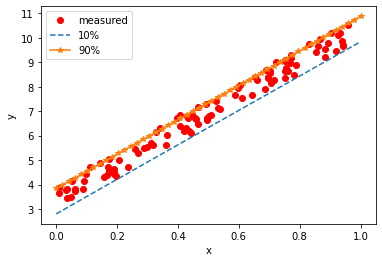

In [13]:
fig, ax = plt.subplots()
ax.plot(x,y,'ro',label='measured')
ax.plot(xl,ll,'--',label='10%')
ax.plot(xl,ul,'-*',label='90%')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

In [14]:
d = st.norm(loc=0,scale=5)
d

<bound method Axes.legend of <AxesSubplot:xlabel='X', ylabel='PDF'>>

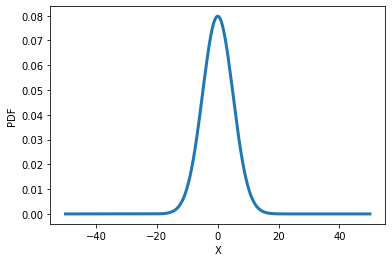

In [15]:
d = st.norm(loc=0, scale=5)
x = np.linspace(-50,50,1000)
yl = d.pdf(x)

ax = plt.subplot()
ax.plot(x,yl,lw=3,label='scale=5')
ax.set_xlabel('X')
ax.set_ylabel('PDF')
ax.legend

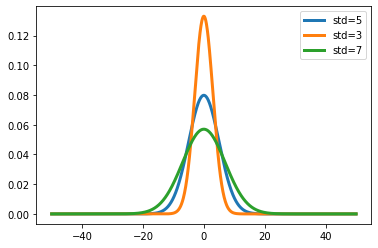

In [16]:
rv1 = st.norm(loc=0,scale =5)
rv2 = st.norm(loc=0,scale =3)
rv3 = st.norm(loc=0,scale =7)

x = np.linspace(-50,50,1000)
y1=rv1.pdf(x)
y2=rv2.pdf(x)
y3=rv3.pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y1,lw=3,label='std=5')
ax.plot(x,y2,lw=3,label='std=3')
ax.plot(x,y3,lw=3,label='std=7')
ax.legend()

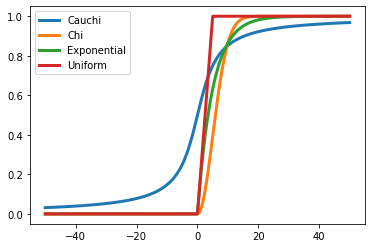

In [18]:
rv1 = st.cauchy(loc=0,scale =5)
rv2 = st.chi(2,loc=0,scale =5)
rv3 = st.expon(loc=0,scale =5)
rv4 = st.uniform(loc=0, scale = 5)

x = np.linspace(-50,50,1000)
y1=rv1.cdf(x)
y2=rv2.cdf(x)
y3=rv3.cdf(x)
y4=rv4.cdf(x)
#cumulative
fig, ax = plt.subplots()
ax.plot(x,y1,lw=3,label='Cauchi')
ax.plot(x,y2,lw=3,label='Chi')
ax.plot(x,y3,lw=3,label='Exponential')
ax.plot(x,y4,lw=3,label='Uniform')
ax.legend()

In [20]:
datos = pd.read_excel('Data/F_Wayne_Tmp_Pcp_Filter.xlsx',sheet_name='Sheet1',
                     index_col=0)
datos.tail()

,Pcr (xx),Pcp (mm)
Date,,
2015-12-27,135,13.5
2015-12-28,284,28.4
2015-12-29,3,0.3
2015-12-30,0,0.0
2015-12-31,0,0.0


In [39]:
datos = datos.rename(columns={'Pcp(mm)':'Ppt'})
datos.head()

,Pcr (xx),Ppt
Date,,
1941-01-01,71,7.1
1941-01-02,15,1.5
1941-01-03,0,0.0
1941-01-04,0,0.0
1941-01-05,0,0.0


<AxesSubplot:xlabel='Date'>

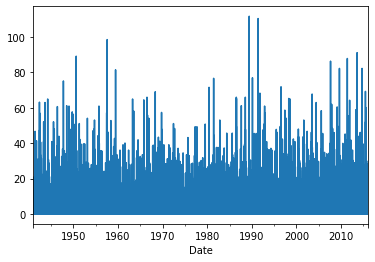

In [41]:
datos['Ppt'].plot()

In [42]:
datos['Ppt'].describe()

count    27393.000000
mean         2.567481
std          6.828232
min          0.000000
25%          0.000000
50%          0.000000
75%          1.300000
max        111.800000
Name: Ppt, dtype: float64

<AxesSubplot:>

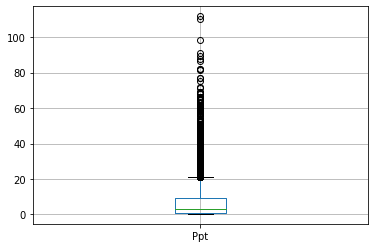

In [43]:
datos[datos['Ppt']>0].boxplot('Ppt')

<AxesSubplot:>

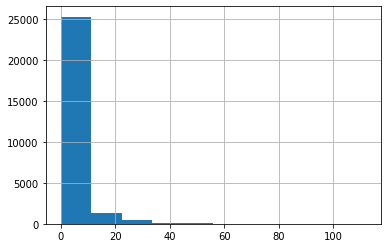

In [44]:
datos['Ppt'].hist()

<AxesSubplot:>

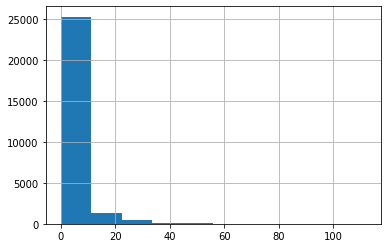

In [45]:
datos['Ppt'].hist(bins=10)

In [46]:
datos.index

DatetimeIndex(['1941-01-01', '1941-01-02', '1941-01-03', '1941-01-04',
               '1941-01-05', '1941-01-06', '1941-01-07', '1941-01-08',
               '1941-01-09', '1941-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=27393, freq=None)

In [47]:
datos['Ppt'].loc['1950-01-01':'1979-12-31'].describe()

count    10957.000000
mean         2.436789
std          6.319161
min          0.000000
25%          0.000000
50%          0.000000
75%          1.300000
max         98.600000
Name: Ppt, dtype: float64

In [63]:
datos = datos[datos['Ppt']>0]
promedio = datos['Ppt'].mean()
desviacion = datos['Ppt'].std()
promedio, desviacion

(7.119242838343962, 9.842940805202408)

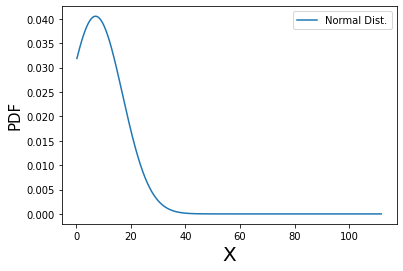

In [64]:
tab = np.arange(datos['Ppt'].min(), datos['Ppt'].max(),0.1)
distnormal = st.norm.pdf(tab, loc=promedio, scale=desviacion)

fig, ax = plt.subplots()
ax.plot(tab, distnormal, label='Normal Dist.')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('PDF',fontsize=15)
ax.legend()

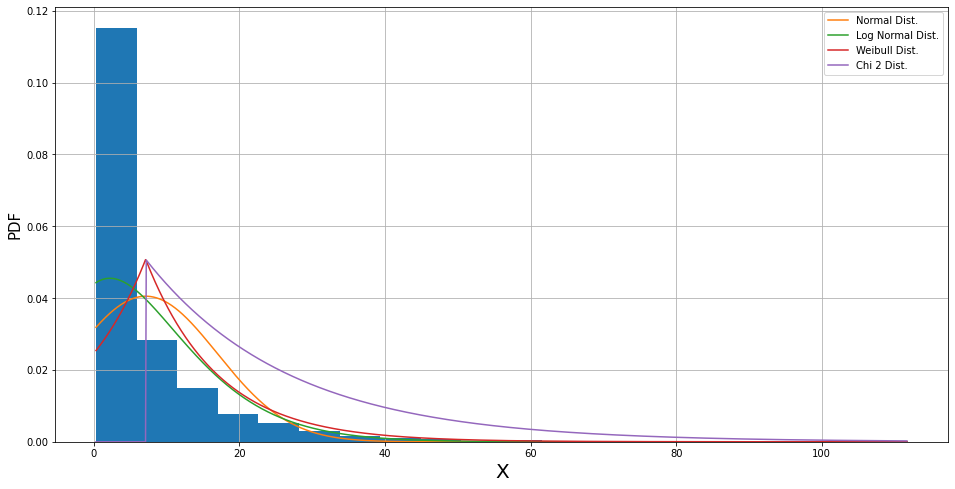

In [67]:
tab = np.arange(datos['Ppt'].min(), datos['Ppt'].max(),0.1)
distnormal = st.norm.pdf(tab, loc=promedio, scale=desviacion)
distlognormal = st.pearson3.pdf(tab, skew=1, loc=promedio, scale=desviacion)
distweibull = st.dweibull.pdf(tab, c=1, loc=promedio, scale=desviacion)
distchi2 = st.chi2.pdf(tab, df=2, loc=promedio, scale=desviacion)
fig, ax = plt.subplots(figsize=(16,8))
datos['Ppt'].hist(bins=20,density=True)
ax.plot(tab, distnormal, label='Normal Dist.')
ax.plot(tab, distlognormal, label='Log Normal Dist.')
ax.plot(tab, distweibull, label='Weibull Dist.')
ax.plot(tab, distchi2, label='Chi 2 Dist.')
ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('PDF',fontsize=15)
ax.legend()